In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Data preparation

In [2]:
df = pd.read_csv('data/course_lead_scoring.csv')
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [3]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [4]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
cat_vars = []
num_vars = []

for col in df.columns:
    if str(df[col].dtype) == 'object':
        cat_vars.append(col)
    else:
        num_vars.append(col)

In [6]:
target = 'converted'
num_vars.remove(target)

In [7]:
print(cat_vars)
print(num_vars)

['lead_source', 'industry', 'employment_status', 'location']
['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']


In [8]:
for col in cat_vars:
    df.loc[df[col].isna(), col] = 'NA'

for col in num_vars:
    df.loc[df[col].isna(), col] = 0

In [9]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

# Split the data

In [10]:
from sklearn.model_selection import train_test_split

seed = 1

# df_train, df_tmp = train_test_split(df, test_size=0.4, random_state=seed)
# df_val, df_test = train_test_split(df_tmp, test_size=0.5, random_state=seed)

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=seed)

y_train = df_train[target]
y_val = df_val[target]
y_test = df_test[target]

for dat in [df_train, df_val, df_test]:
    dat.drop(columns=target, inplace=True)

In [11]:
print(df_train.shape[0])
print(df_val.shape[0])
print(df_test.shape[0])

876
293
293


In [12]:
print(df_train.shape[0] / df_test.shape[0])
print(df_val.shape[0] / df_test.shape[0])
print(df_test.shape[0] / df_test.shape[0])

2.9897610921501707
1.0
1.0


# Question 1

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

for var in num_vars:
    print(var)
    print(roc_auc_score(y_train, df_train[var]))
    # sns.lineplot(roc_curve(y_train, df_train[var]))

number_of_courses_viewed
0.7635680590007088
annual_income
0.5519578313253012
interaction_count
0.738270176293409
lead_score
0.6144993577250176


# Question 2

In [14]:
# One-hot encoding

X_train = pd.get_dummies(df_train, drop_first=False).astype(int)
X_val = pd.get_dummies(df_val, drop_first=False).astype(int)


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

In [16]:
roc_auc_score(y_pred > 0.5, y_val)

0.7553909465020576

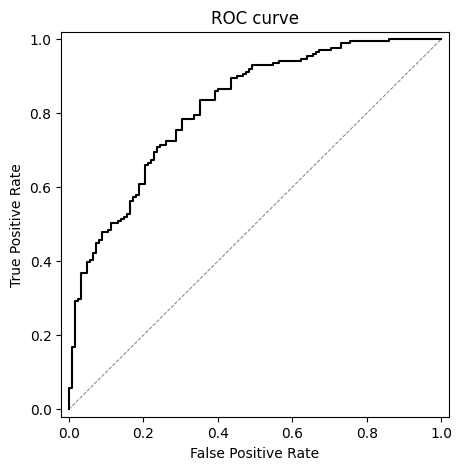

0.8164126162400538

In [17]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

auc(fpr, tpr)

# Question 3

/Users/mikhail_churakov/Projects/ml-zoomcamp/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/mikhail_churakov/Projects/ml-zoomcamp/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.64


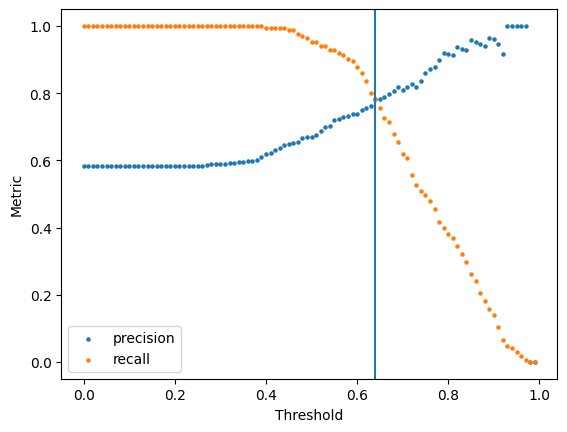

In [18]:
from sklearn.metrics import precision_score, recall_score

precision, recall = [], []
threshold = np.arange(0, 1, 0.01)
for thr in threshold:
    # print(thr)
    precision.append(precision_score(y_val, y_pred > thr))
    recall.append(recall_score(y_val, y_pred > thr))

plt.scatter(threshold, precision, s=5, label='precision')
plt.scatter(threshold, recall, s=5, label='recall')

thr = threshold[np.argmin([abs(precision[i] - recall[i]) for i in range(len(recall))])]
print(thr)
plt.axvline(thr)

plt.xlabel('Threshold')
plt.ylabel('Metric')
plt.legend();

0.55


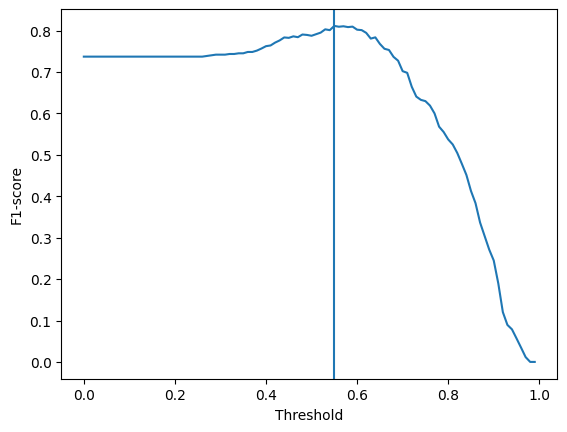

In [19]:
from sklearn.metrics import f1_score

scores = []
for thr in threshold:
    scores.append(f1_score(y_val, y_pred > thr))

plt.plot(threshold, scores)

thr = threshold[np.argmax(scores)]
print(thr)
plt.axvline(thr)
plt.xlabel('Threshold')
plt.ylabel('F1-score');

# Question 4

In [20]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [21]:
from sklearn.feature_extraction import DictVectorizer

def train(df, y, c=1.0):
    cat = df[cat_vars + num_vars].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[cat_vars + num_vars].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [22]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train[target].values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val[target].values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [23]:
print(np.array(aucs).round(3))
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

[0.806 0.871 0.775 0.802 0.856]
auc = 0.822 ± 0.036


# Question 5

In [24]:
for c in [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        y_train = df_train[target].values

        df_val = df_train_full.iloc[val_idx]
        y_val = df_val[target].values

        dv, model = train(df_train, y_train, c=c)
        y_pred = predict(df_val, dv, model)

        rocauc = roc_auc_score(y_val, y_pred)
        aucs.append(rocauc)
    
    print(f'{c=}')
    print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))
    print()

c=1e-06
auc = 0.560 ± 0.024

c=0.001
auc = 0.867 ± 0.029

c=1
auc = 0.822 ± 0.036

